In [182]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [183]:
import numpy as np
import pandas as pd

In [184]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [185]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [186]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [187]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [188]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [189]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [190]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Climate Analysis

In [191]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_12_months = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_12_months)

('2017-08-23',)


In [192]:
# Calculate the date 1 year ago from the last data point in the database
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


In [193]:
# Perform a query to retrieve the data and precipitation scores
data_precip_scores = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year_ago).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
data_precip_scores_df = pd.DataFrame(data_precip_scores)
data_precip_scores_df.head()
data_precip_scores_df.set_index('date').head()

# Sort the dataframe by date
data_precip_scores_df.sort_values(by='date', ascending = True)
data_precip_scores_df.set_index('date').sort_values(by='date', ascending = True).head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


Text(0.5,0,'Date')

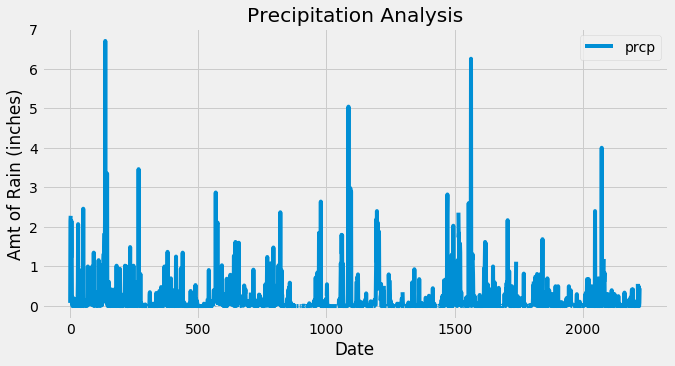

In [212]:
# Use Pandas Plotting with Matplotlib to plot the data
data_precip_plot = data_precip_scores_df.plot(figsize=(10,5))
plt.title("Precipitation Analysis")
data_precip_plot.set_ylabel('Amt of Rain (inches)')
data_precip_plot.set_xlabel('Date')


In [213]:
#reset index to date
data_precip_scores_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


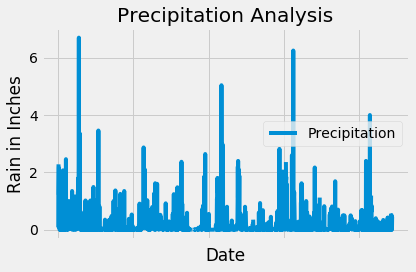

In [211]:
# plot the dataframe
data_precip_scores_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis")
plt.legend(["Precipitation"])
plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [155]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_precip_scores_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

# Station Analysis

In [175]:
engine = create_engine("sqlite:///hawaii.sqlite")

# Design a query to show how many stations are available in this dataset?
stations = session.query(Measurement).group_by(Measurement.station).count()
print(stations,".")
print("there are", stations, "stations")

9 .
there are 9 stations


In [173]:
# What are the most active stations? (i.e. what stations have the most rows)?
most_active = session.query(Measurement.station, 
        func.count(Measurement.station).\
        label('count')).\
        group_by(Measurement.station)
        order_by("count").all()

# List the stations and the counts in descending order.
most_active_df = pd.DataFrame(most_active)


SyntaxError: unexpected character after line continuation character (<ipython-input-173-4f882c6eef6b>, line 2)

In [150]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


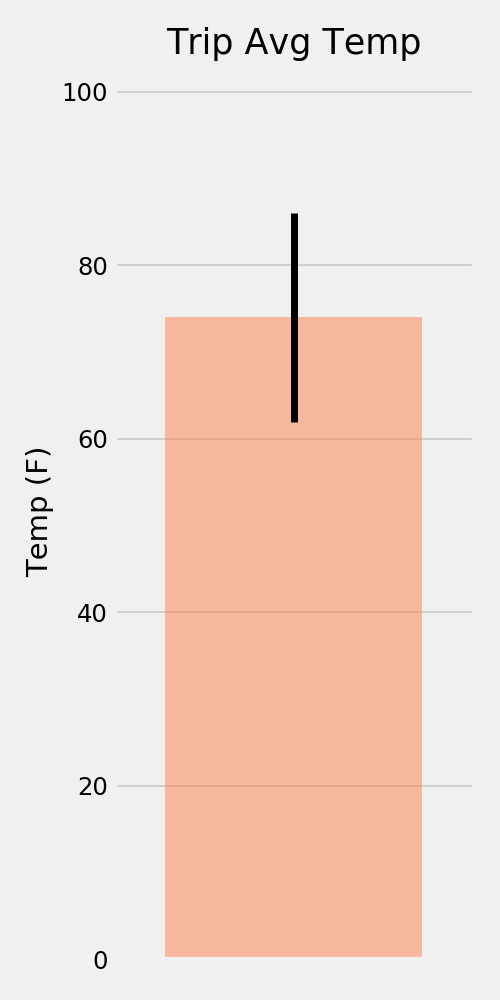

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
